# Librosa Image Display
This Document contains funtions that can be called to display an audio file as either a wave fuction, or a Mel-spectrogram. Each fucntion takes a number of variables, allowing for flexability in how the image is displayed

In [4]:
#Import libraries
import warnings
warnings.filterwarnings('ignore')

import librosa, librosa.display
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt

from IPython.display import Audio
import soundfile as sf
#%matplotlib inline

In [5]:
#Initialise variables
n_mels=256
hop_length=128
fmax=8000
AUDIO_CLIP_DURATION = 5 # seconds 
AUDIO_NFFT =  2048
AUDIO_WINDOW = None
AUDIO_STRIDE = 200
AUDIO_SAMPLE_RATE = 48000
AUDIO_MELS = 260
AUDIO_FMIN = 20
AUDIO_FMAX =13000
AUDIO_TOP_DB = 80

# Wave Function  

The below function displays the audio as a wave function and includes a number of optional values that can be included 
on the image

The input variables are as follows:
- filepath: String, path of the audio file must be provided
- plt_x_axis: Boolean value, entering true plots values on the x axis, entering False removes the legend from the x axis
- plt_y_axis:Boolean value, entering true plots values on the y axis, entering False removes the legend from the y axis
- plt_title: Boolean value, entering true plots a title at the top of the image, entering False removes the title from the image
- image_title: String: If plt_title is true, this string will be presented as a title at the top of the image. OPTIONAL FIELD: default value = 0
- image_width: Integer value, specifys the width of the output image. OPTIONAL FIELD: Default value = 20
- image_height: Integer value, specifys the height of the output image. OPTIONAL FIELD: Default value = 10


In [28]:
def DisplayWave(filepath,plt_x_axis,plt_y_axis,plt_title,image_title = " ", image_width = 20,image_height = 10):
    audio, sr = librosa.load(filepath)
    plt.figure(figsize = (image_width,image_height))
    librosa.display.waveshow(y=audio, sr=sr)
    if plt_title:
        plt.title(image_title, fontdict=dict(size=18))
    if plt_x_axis:    
        plt.xlabel('Time', fontdict=dict(size=15))
    if plt_y_axis:
        plt.ylabel('Amplitude', fontdict=dict(size=15))
    plt.show()

# Mel Spectrogram

The below function displays the audio converted into a mel-spectrogram and incluides a number of optional values that can be included on the image

The input variables are as follows:
- filepath: String, path of the audio file must be provided
- plt_x_axis: Boolean value, entering true plots values on the x axis, entering False removes the legend from the x axis
- plt_y_axis:Boolean value, entering true plots values on the y axis, entering False removes the legend from the y axis
- plt_colourBar:Boolean value, entering true plots a colour bar legend on the side of the image to show the values of the colours in the image
- plt_title: Boolean value, entering true plots a String title at the top of the image, entering False removes the title from the image
- plt_shape: Boolean value, True Prints the shape of the Mel spec in the title of the image
- image_title: String: If plt_title is true, this string will be presented as a title at the top of the image. OPTIONAL FIELD: Default value = " "
- image_width: Integer value, specifys the width of the output image. OPTIONAL FIELD: Default value = 15
- image_height: Integer value, specifys the height of the output image. OPTIONAL FIELD: Default value = 10

In [46]:
def DisplayMelSpec(filepath,plt_x_axis,plt_y_axis,plt_colourBar,plt_title,plt_shape, image_title = " ",image_width=15,image_height = 10):
    if plt_x_axis:
        x_axis_label ='time'
    else:
        x_axis_label =None
        
    if plt_y_axis:
        y_axis_label ='mel'
    else:
        y_axis_label =None   
    
    audio, sr = librosa.load(filepath)                     
    mel_spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr,n_mels=AUDIO_MELS, hop_length=AUDIO_STRIDE, fmax=AUDIO_FMAX)
    fig = plt.figure(figsize = (image_width,image_height))
    ax = fig.add_subplot(111)

    img = librosa.display.specshow(librosa.power_to_db(mel_spectrogram, ref=np.max),x_axis=x_axis_label,  y_axis=y_axis_label, hop_length = 128, fmax=8000)
    Plot_colourBar=plt_colourBar
    if Plot_colourBar:
        fig.colorbar(img, ax=ax, format=f'%0.2f dB')
    
    
    if plt_title and plt_shape:
        plt.title(image_title + "  ( "+str(mel_spectrogram.shape[0])+ " , "+ str(mel_spectrogram.shape[1])+" )")
    elif plt_title:
        plt.title(image_title)
    elif plt_shape:
        plt.title("  ( "+str(mel_spectrogram.shape[0])+ " , "+ str(mel_spectrogram.shape[1])+" )")
    plt.show()

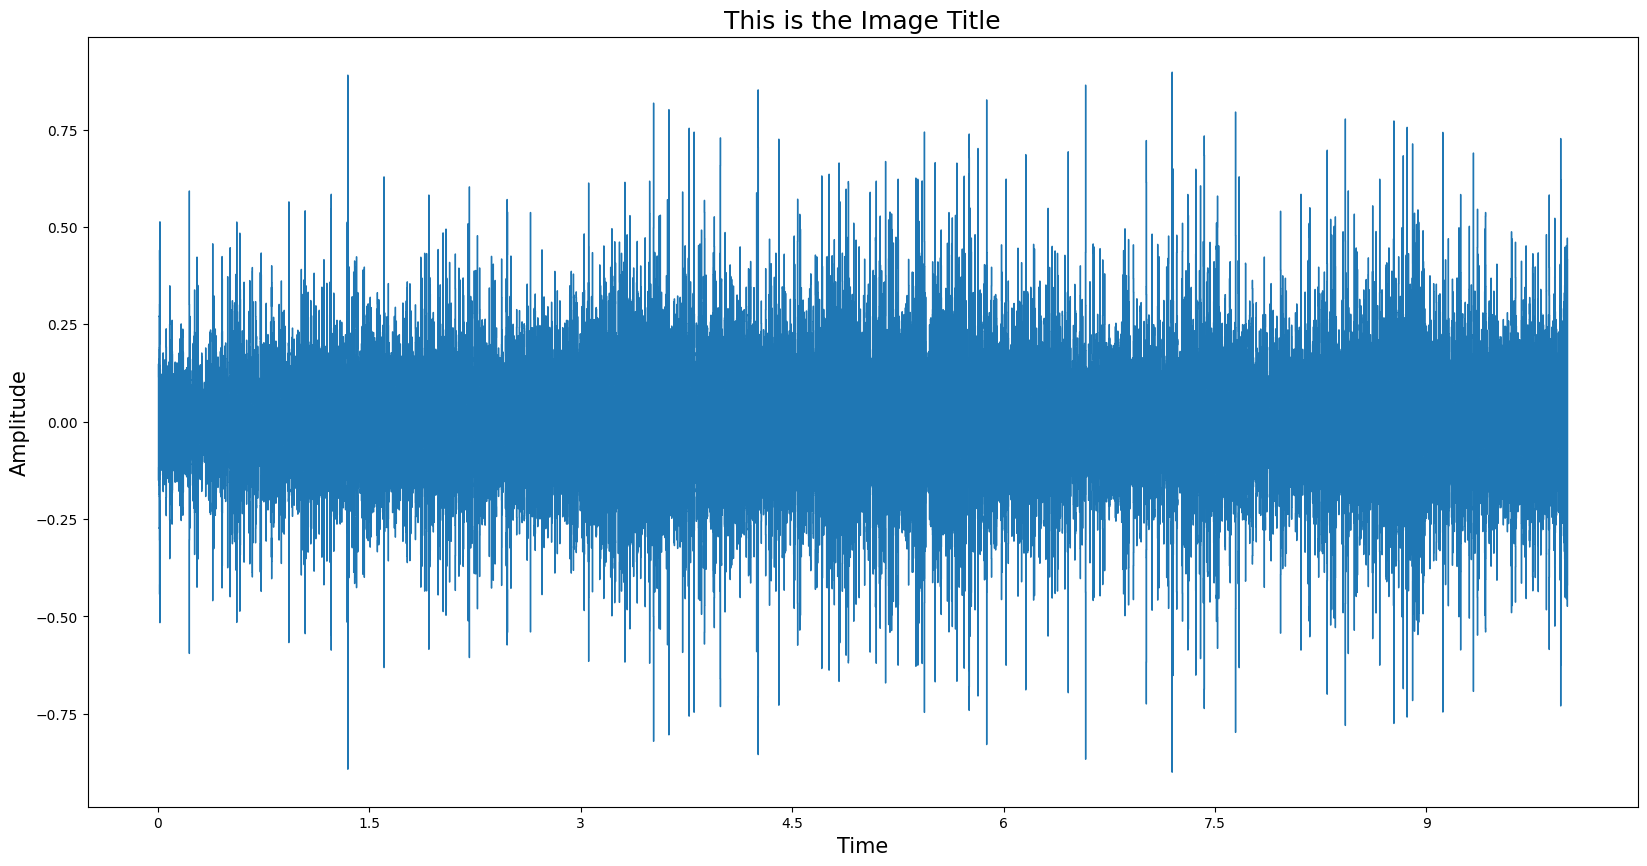

In [32]:
DisplayWave("test_data/rain4.aiff",True,True,True,"This is the Image Title")

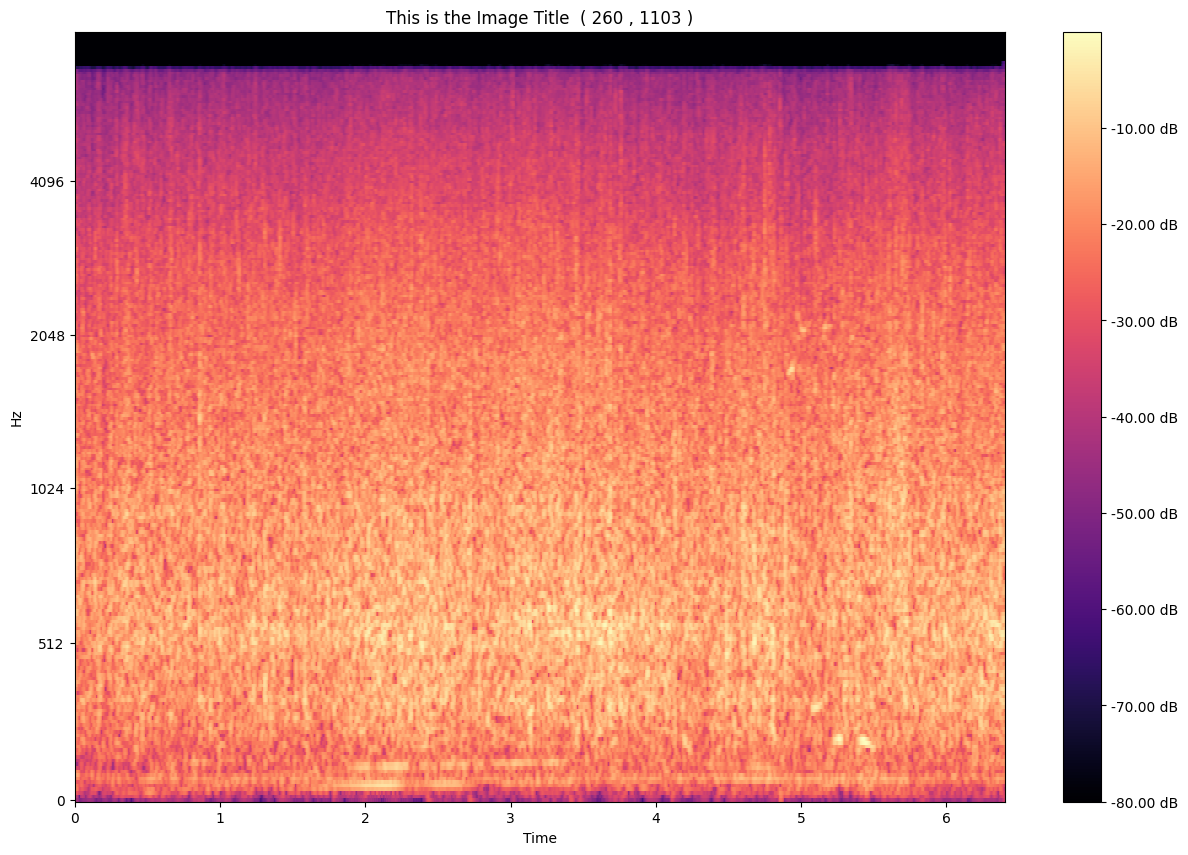

In [49]:
DisplayMelSpec("test_data/rain4.aiff",True,True,True,True,True,"This is the Image Title")